## 重要属性 components_

In [1]:
from sklearn.datasets import fetch_lfw_people  # 7个人的1000多张人脸图片组成的一组人脸数据
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# 实例化   min_faces_per_person=60：每个人取出60张脸图
faces = fetch_lfw_people(min_faces_per_person=60)
faces  # 一个字典形式的数据
faces.images.shape  # （1277,62,47）  1277是矩阵中图像的个数，62是每个图像的特征矩阵的行，47是每个图像的特征矩阵的列
# 怎样理解这个数据的维度？
faces.data.shape  # （1277,2914）   行是样本，列是样本相关的所有特征：2914 = 62 * 47
# 换成特征矩阵之后，这个矩阵是什么样？
X = faces.data

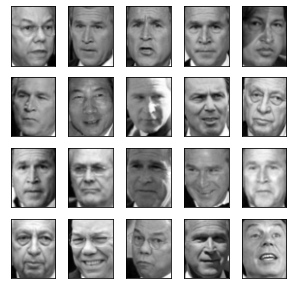

In [16]:
# 数据本身是图像，和数据本身只是数字，使用的可视化方法不同

# 创建画布和子图对象
fig, axes = plt.subplots(4, 5,  # 4行5列个图
                         figsize=(5, 5),  # figsize指的是图的尺寸
                         subplot_kw={"xticks": [], "yticks": []}  # 不要显示坐标轴
                         )
fig  # 指的是画布

axes
# 不难发现，axes中的一个对象对应fig中的一个空格
# 我们希望，在每一个子图对象中填充图像（共20张图），因此我们需要写一个在子图对象中遍历的循环
axes.shape  # （4,5）


# 二维结构，可以有两种循环方式，一种是使用索引，循环一次同时生成一列上的四个图
# 另一种是把数据拉成一维，循环一次只生成一个图
# 在这里，究竟使用哪一种循环方式，是要看我们要画的图的信息，储存在一个怎样的结构里
# 我们使用 子图对象.imshow 来将图像填充到空白画布上
# 而imshow要求的数据格式必须是一个(m,n)格式的矩阵，即每个数据都是一张单独的图
# 因此我们需要遍历的是faces.images，其结构是(1277, 62, 47)
# 要从一个数据集中取出20个图，明显是一次性的循环切片[i,:,:]来得便利
# 因此我们要把axes的结构拉成一维来循环
# [*axes.flat]#2维
axes.flat  # 降低一个维度
# [*axes.flat] #1维
[*enumerate(axes.flat)]

# 填充图像
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i, :, :],
              cmap='gray'  # 选择色彩的模式
              )
# cmap参数取值选择各种颜色：https://matplotlib.org/tutorials/colors/colormaps.html

In [17]:
# 原本有2900维，我们现在来降到150维
# 这里X = faces.data，不是faces.images.shape ,因为sklearn只接受2维数组降，不接受高维数组降
pca = PCA(150).fit(X)

In [19]:
x_dr = pca.transform(X)
x_dr.shape

(1348, 150)

In [21]:
V = pca.components_  # 新特征空间
V.shape  # V（k，n）   (150, 2914)

(150, 2914)

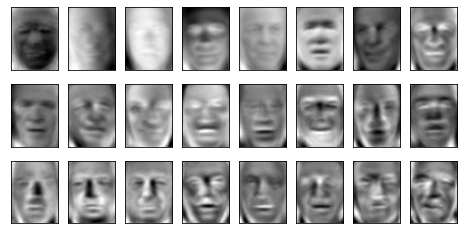

In [22]:
fig, axes = plt.subplots(3, 8, figsize=(8, 4), subplot_kw={
                         "xticks": [], "yticks": []})

for i, ax in enumerate(axes.flat):
    ax.imshow(V[i, :].reshape(62, 47), cmap='gray')

## 接口inverse_transfrom

In [23]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [24]:
faces = fetch_lfw_people(min_faces_per_person=60)
faces.images.shape
# 怎样理解这个数据的维度？
faces.data.shape
# 换成特征矩阵之后，这个矩阵是什么样？
X = faces.data

In [26]:
pca = PCA(150) # 实例化
X_dr = pca.fit_transform(X) # 拟合+提取结果
X_dr.shape

(1348, 150)

In [29]:
X_inverse = pca.inverse_transform(X_dr)
X_inverse.shape  # (1348, 2914)

(1348, 2914)

In [30]:
faces.images.shape  # (1348, 62, 47)

(1348, 62, 47)

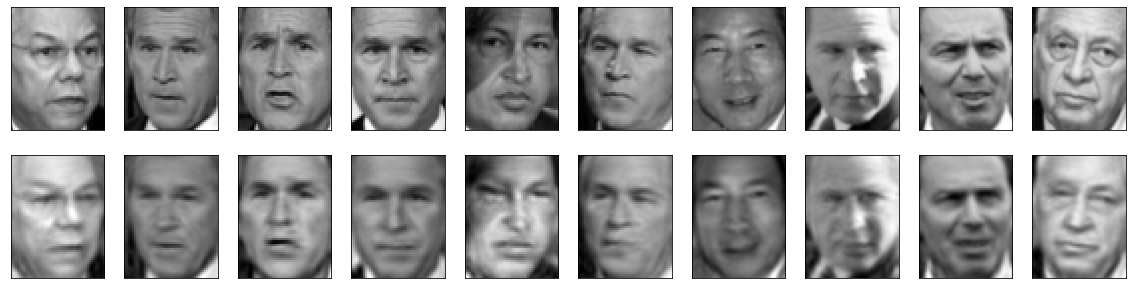

In [33]:
fig, ax = plt.subplots(2, 10,
                       figsize=(20, 5),
                       subplot_kw={"xticks": [], "yticks": []})

# 和2.3.3节中的案例一样，我们需要对子图对象进行遍历的循环，来将图像填入子图中
# 那在这里，我们使用怎样的循环？
# 现在我们的ax中是2行10列，第一行是原数据，第二行是inverse_transform后返回的数据
# 所以我们需要同时循环两份数据，即一次循环画一列上的两张图，而不是把ax拉平
for i in range(10):
    ax[0, i].imshow(faces.images[i, :, :], cmap='binary_r')
    ax[1, i].imshow(X_inverse[i].reshape(62, 47), cmap='binary_r')

## 用PCA做噪音过滤

In [34]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [35]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [37]:
set(digits.target.tolist())  # 查看target有哪几个数  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [39]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

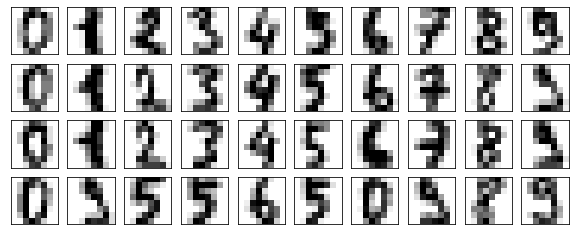

In [40]:
def plot_digits(data):
    # data的结构必须是（m,n），并且n要能够被分成（8,8）这样的结构
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={
                             "xticks": [], "yticks": []})
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary')


plot_digits(digits.data)

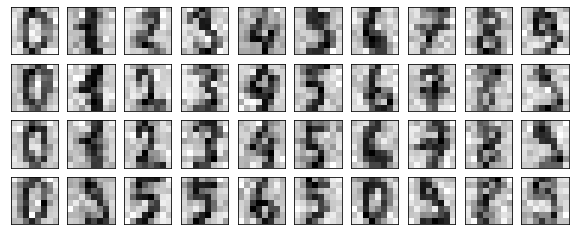

In [41]:
rng = np.random.RandomState(42)
# 在指定的数据集中，随机抽取服从正态分布的数据
# 两个参数，分别是指定的数据集，和抽取出来的正太分布的方差
noisy = rng.normal(digits.data, 2)  # np.random.normal(digits.data,2)
plot_digits(noisy)

In [42]:
pca = PCA(0.5, svd_solver='full').fit(noisy)
X_dr = pca.transform(noisy)
X_dr.shape  # (1797, 6)

(1797, 6)

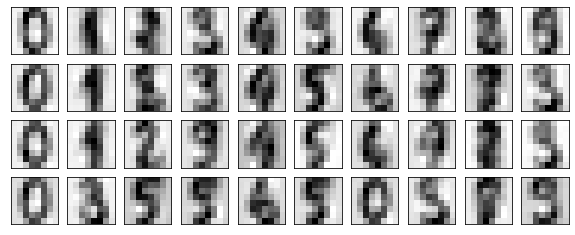

In [43]:
without_noise = pca.inverse_transform(X_dr)
plot_digits(without_noise)